***
# 02-Policy-Iteration
***

## Definition by ChatGPT :
### Policy Iteration is an algorithm used in the field of reinforcement learning to find an optimal policy for a given Markov Decision Process (MDP). Here's a simple definition of the Policy Iteration Algorithm:

### Policy Iteration is an iterative process that alternates between two main steps:

### Policy Evaluation:

Start with an initial policy.
Evaluate the value function (expected cumulative reward) for each state under this policy.
Update the value function until it converges to the true values.

### Policy Improvement:

Based on the current value function, improve the policy by selecting actions that maximize expected cumulative reward in each state.
Update the policy.
Repeat these steps iteratively until the policy no longer changes or changes minimally. The algorithm guarantees convergence to an optimal policy, where the policy cannot be further improved, and the associated value function is optimal.

In summary, Policy Iteration combines the steps of evaluating and improving the policy iteratively until an optimal policy is found for the given MDP.

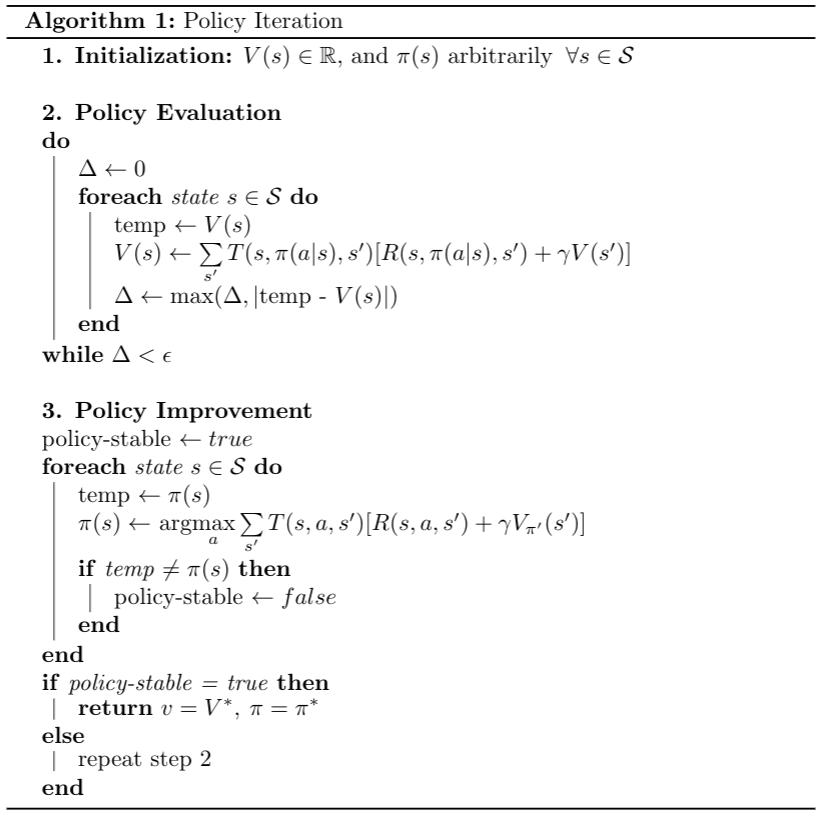

## Policy Evaluation

In [1]:
import gym
import time 
import pygame
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [2]:
env = gym.make('FrozenLake-v1', desc=None, map_name='4x4', is_slippery=False)

In [3]:
# define two random policy with probability of 0.25 and 0.20 for each action

num_states = env.observation_space.n
num_actions = env.action_space.n 

random_policy_1 = np.ones((num_states, num_actions))/4
random_policy_2 = np.ones((num_states, num_actions))/5
print(random_policy_1,'\n\n',random_policy_2)

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]] 

 [[0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2]]


In [4]:
gamma = 0.99
theta = 1e-9

def policy_evaluation(policy):
    iteration = 0
    old_V = np.zeros(num_states)
    
    
    while True:
        delta = 0
        V = np.zeros(num_states)
        
        for state in range(num_states):
            for action in range(num_actions):
                for  prob, next_state, reward, _ in env.P[state][action]:
                    V[state] += prob * policy[state][action] * (reward + gamma * old_V[next_state])
                                       
        delta = np.max(np.abs(V - old_V))
                                       
        if delta < theta:
            break
                                                         
        old_V = np.copy(V)
                                       
    return V  

In [5]:
V_1 = policy_evaluation(random_policy_1)
V_2 = policy_evaluation(random_policy_2)

In [6]:
print(f'V1 Policy Evaluation: \n {V_1.reshape(4, 4)}\n\nV2 policy evaluation: \n {V_2.reshape(4, 4)}')

V1 Policy Evaluation: 
 [[0.01235613 0.01042446 0.01933843 0.00947775]
 [0.01478705 0.         0.03889445 0.        ]
 [0.03260247 0.08433764 0.13781085 0.        ]
 [0.         0.17034482 0.43357944 0.        ]]

V2 policy evaluation: 
 [[0.00115074 0.00127407 0.00400991 0.0013145 ]
 [0.00223627 0.         0.01365356 0.        ]
 [0.00790729 0.02979224 0.06494749 0.        ]
 [0.         0.07761108 0.28457181 0.        ]]


## Policy Improvement

In [7]:
gamma = 0.99

def policy_imporovement(V):
    policy = np.zeros((num_states, num_actions))
    Q = np.zeros((num_states, num_actions))

    for state in range(num_states):
        for action in range(num_actions):
            for prob, next_state, reward, _ in env.P[state][action]:
                Q[state][action] += prob * (reward + gamma * V[next_state]) 
    
    max_index = np.argmax(Q, axis=1)
    
    for i, optimal_action in enumerate(max_index):
        policy[i][optimal_action] = 1
    
    return policy

In [8]:
policy_p1 = policy_imporovement(V_1)
policy_p2 = policy_imporovement(V_2)

In [9]:
print(policy_p1,'\n\n', policy_p2,'\n\n', 'Comparison:\n', policy_p1 == policy_p2)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]] 

 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]] 

 Comparison:
 [[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


## Policy Iteration

In [10]:
def policy_iteration(policy):
    old_policy = policy
    iteration_p = 0
    
    while True:
        iteration_p += 1
    
        V = policy_evaluation(policy)
        policy = policy_imporovement(V)

        comparison = (old_policy == policy)
        if comparison.all() == True:
            break
        old_policy = policy
    
    return policy, iteration_p

In [11]:
optimal_policy_1, iteration_p = policy_iteration(random_policy_1)
optimal_policy_2, iteration_p = policy_iteration(random_policy_2)

In [12]:
print(optimal_policy_1,'\n\n', optimal_policy_2,'\n\n', 'Comparison:\n', optimal_policy_1 == optimal_policy_2)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]] 

 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]] 

 Comparison:
 [[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


## Plot Optimal Policy

In [13]:
final_policy = np.zeros((num_states))

for state in range(num_states):
    for action in range(num_actions):
        final_policy = np.argmax(optimal_policy_1, axis=1)

In [14]:
final_policy.reshape(4, 4)

array([[1, 2, 1, 0],
       [1, 0, 1, 0],
       [2, 1, 1, 0],
       [0, 2, 2, 0]], dtype=int64)

In [15]:
def visualize_policy(policy, title="*Optimal Policy*\n\n0:Left \t 1:Down \t 2:Right \t 3:Up"):
    shape = (4, 4)
    policy_grid = np.reshape(policy, shape)

    sns.set(style="white")
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(policy_grid, cmap='coolwarm', annot=True, linewidth=1, fmt="d", cbar=False, ax=ax)

    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

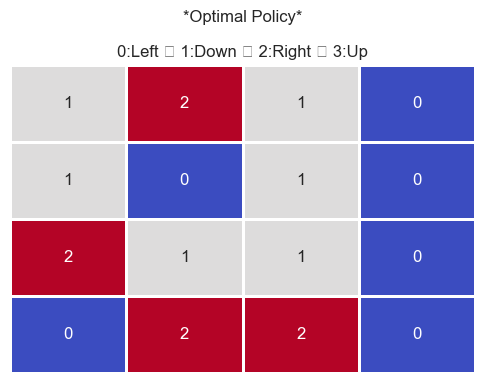

In [17]:
visualize_policy(final_policy)

## Use Final Policy(Optimal) in Environment

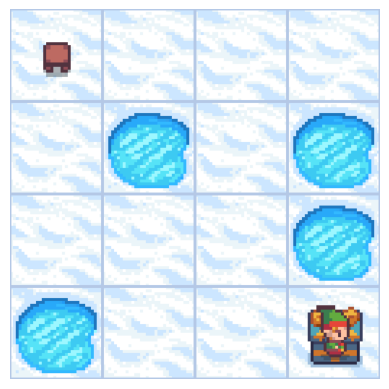

In [18]:
state = env.reset()
done = False
t = 0
while not done:
    time.sleep(0.2)
    action = final_policy[state]
    next_state, reward, done, _ = env.step(action)
    t += 1
    state = next_state

    plt.axis('off')
    plt.imshow(env.render(mode='rgb_array'))
    display.display(plt.gcf())    
    display.clear_output(wait=True)

env.close()